In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
import seaborn as sns

In [86]:
house = pd.read_csv('/Users/justinsheng/Library/CloudStorage/OneDrive-UniversityofToronto/Justin/Schulich_2023-2024/MBAN6110/kc_house_data.csv')

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
house.dropna(inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

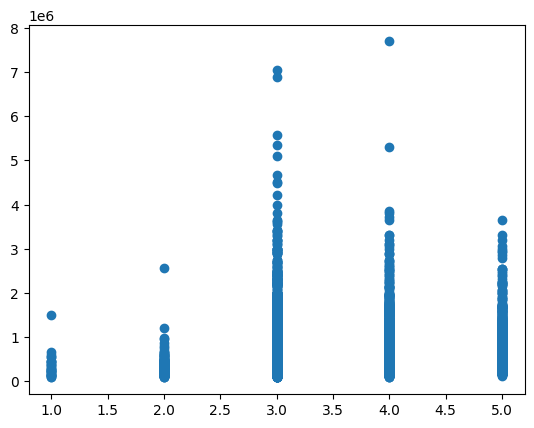

In [7]:
plt.scatter(house['condition'],house['price'])

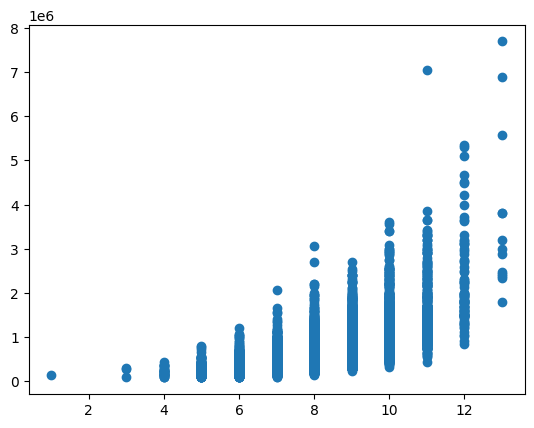

In [8]:
plt.scatter(house['grade'],house['price'])

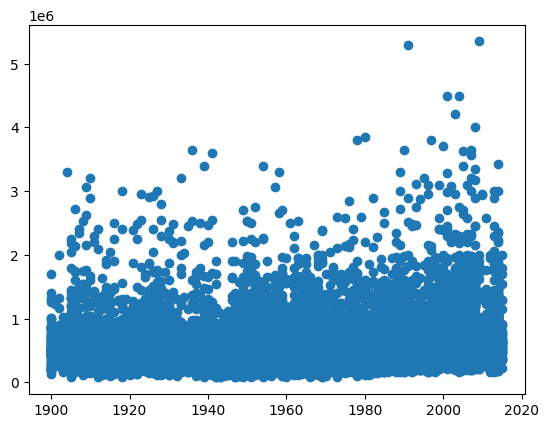

In [137]:
plt.scatter(house['yr_built'],house['price'])

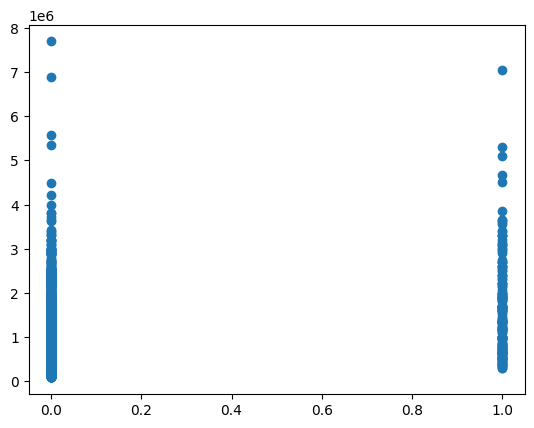

In [9]:
plt.scatter(house['waterfront'],house['price'])

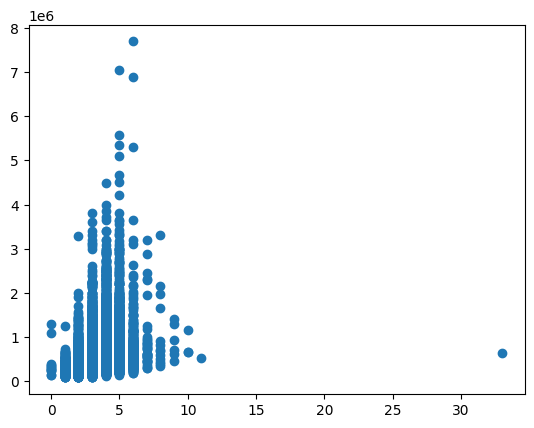

In [10]:
plt.scatter(house['bedrooms'],house['price'])

<Axes: ylabel='bedrooms'>

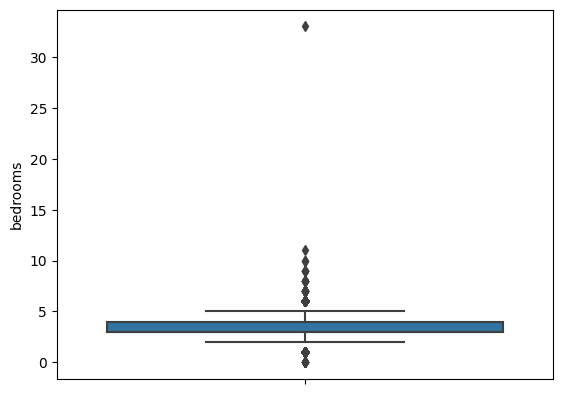

In [11]:
sns.boxplot(y = house['bedrooms'])

In [12]:
house[house["bedrooms"] > 15]
house[house["bedrooms"] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.00,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
3119,3918400017,20150205T000000,380000.0,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
3467,1453602309,20140805T000000,288000.0,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,20141002T000000,228000.0,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
6994,2954400190,20140624T000000,1295650.0,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8477,2569500210,20141117T000000,339950.0,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
8484,2310060040,20140925T000000,240000.0,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
9773,3374500520,20150429T000000,355000.0,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
12653,7849202299,20150218T000000,320000.0,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675


In [87]:
house.drop(875, axis=0, inplace=True)
house.drop(3119, axis=0, inplace=True)
house.drop(3467, axis=0, inplace=True)
house.drop(4868, axis=0, inplace=True)
house.drop(6994, axis=0, inplace=True)
house.drop(8477, axis=0, inplace=True)
house.drop(8484, axis=0, inplace=True)
house.drop(9773, axis=0, inplace=True)
house.drop(9854, axis=0, inplace=True)
house.drop(12653, axis=0, inplace=True)
house.drop(14423, axis=0, inplace=True)
house.drop(18379, axis=0, inplace=True)
house.drop(19452, axis=0, inplace=True)

<Axes: ylabel='bathrooms'>

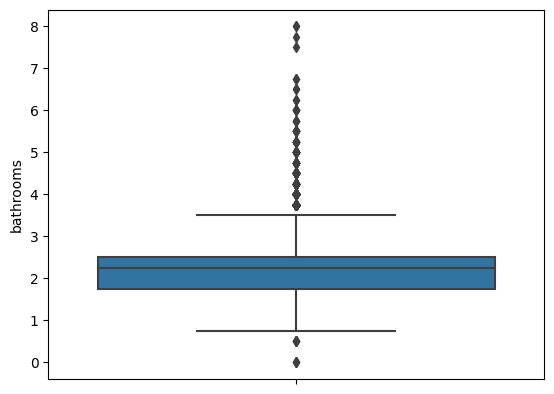

In [14]:
sns.boxplot(y = house['bathrooms'])

In [15]:
house[house["bathrooms"] > 6]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4024,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,2,...,11,5080,2400,1953,0,98166,47.4643,-122.368,2810,33190
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800
14556,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,4,...,13,6120,2550,1965,2003,98177,47.7295,-122.372,4140,81021
18302,6072800246,20140702T000000,3300000.0,5,6.25,8020,21738,2.0,0,0,...,11,8020,0,2001,0,98006,47.5675,-122.189,4160,18969
20578,424069279,20150328T000000,1180000.0,6,6.50,6260,10955,2.0,0,0,...,11,4840,1420,2007,0,98075,47.5947,-122.039,2710,12550
21506,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,0,...,12,6420,850,2010,0,98027,47.5371,-121.982,1800,44890


In [88]:
house.drop(4024, axis=0, inplace=True)
house.drop(7252, axis=0, inplace=True)
house.drop(8092, axis=0, inplace=True)
house.drop(8546, axis=0, inplace=True)
house.drop(9254, axis=0, inplace=True)
house.drop(12777, axis=0, inplace=True)
house.drop(14556, axis=0, inplace=True)
house.drop(18302, axis=0, inplace=True)
house.drop(20578, axis=0, inplace=True)
house.drop(21506, axis=0, inplace=True)

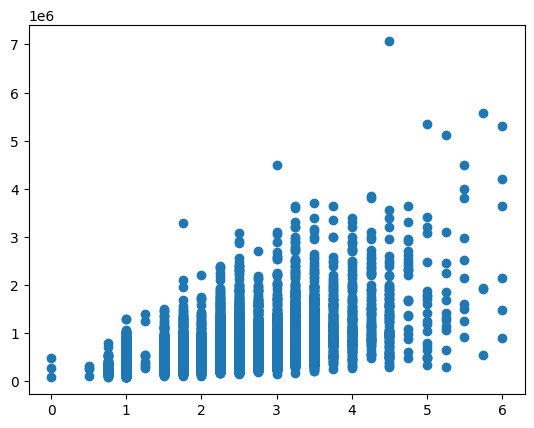

In [17]:
plt.scatter(house['bathrooms'],house['price'])

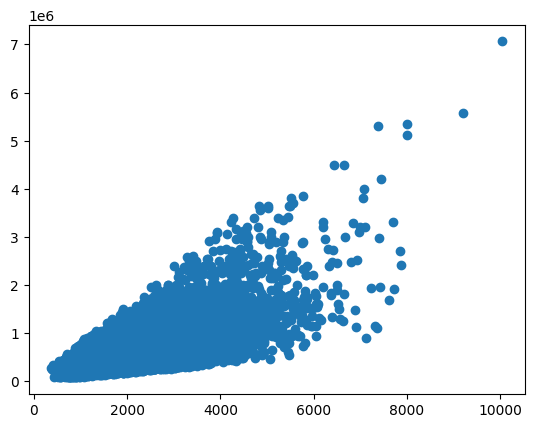

In [18]:
plt.scatter(house['sqft_living'],house['price'])

<Axes: ylabel='sqft_living'>

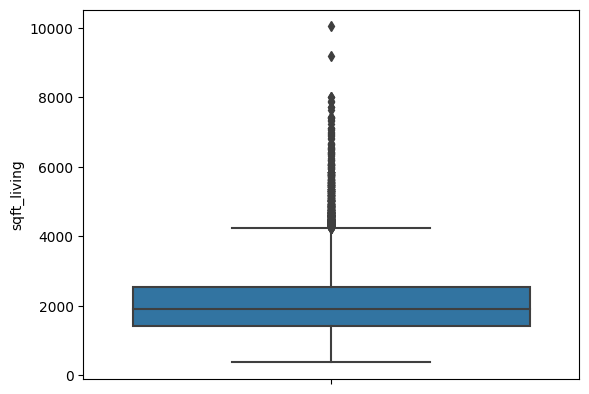

In [19]:
sns.boxplot(y = house['sqft_living'])

In [20]:
house[house["sqft_living"] > 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345


In [89]:
house.drop(1164, axis=0, inplace=True)
house.drop(3914, axis=0, inplace=True)
house.drop(4411, axis=0, inplace=True)

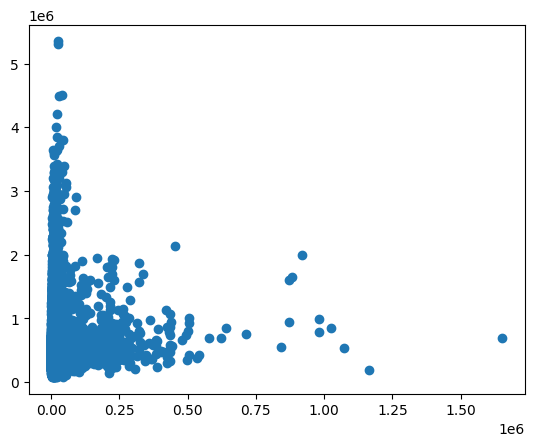

In [22]:
plt.scatter(house['sqft_lot'],house['price'])

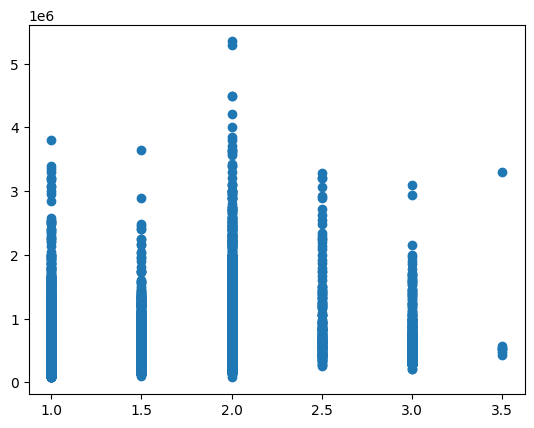

In [23]:
plt.scatter(house['floors'],house['price'])

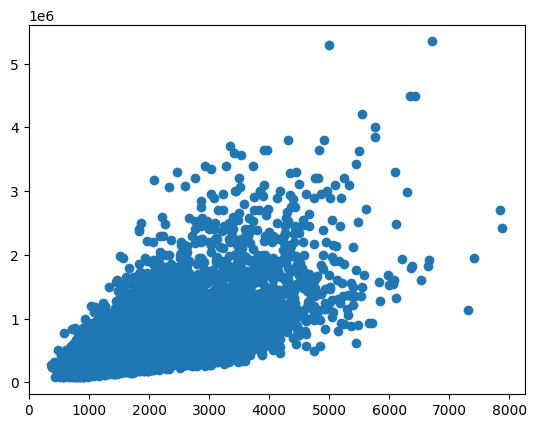

In [24]:
plt.scatter(house['sqft_above'],house['price'])

<Axes: ylabel='sqft_above'>

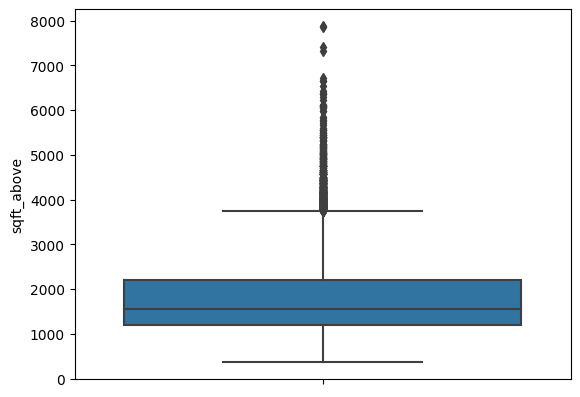

In [25]:
sns.boxplot(y = house['sqft_above'])

In [26]:
house[house["sqft_above"] > 7000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11871,8835800350,20150112T000000,1950000.0,4,3.25,7420,167869,2.0,0,3,...,12,7420,0,2002,0,98045,47.4548,-121.764,5610,169549
13411,2426039123,20150130T000000,2415000.0,5,4.75,7880,24250,2.0,0,2,...,13,7880,0,1996,0,98177,47.7334,-122.362,2740,10761
18594,3023069166,20140708T000000,1135250.0,5,4.00,7320,217800,2.0,0,0,...,11,7320,0,1992,0,98058,47.4473,-122.086,3270,34500
19858,2524069078,20150122T000000,2700000.0,4,4.00,7850,89651,2.0,0,0,...,12,7850,0,2006,0,98027,47.5406,-121.982,6210,95832


In [90]:
house.drop(11871, axis=0, inplace=True)
house.drop(13411, axis=0, inplace=True)
house.drop(18594, axis=0, inplace=True)
house.drop(19858, axis=0, inplace=True)

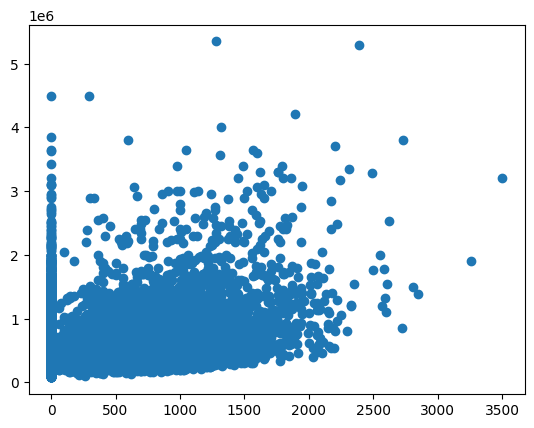

In [28]:
plt.scatter(house['sqft_basement'],house['price'])

<Axes: ylabel='sqft_basement'>

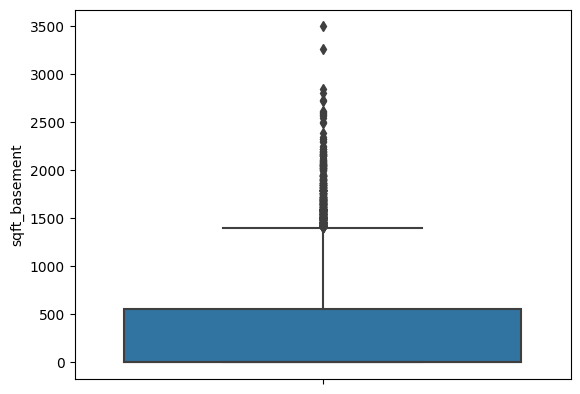

In [29]:
sns.boxplot(y = house['sqft_basement'])

In [91]:
house[house["sqft_basement"] > 3000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10085,7767000060,20140912T000000,1900000.0,5,4.25,6510,16471,2.0,0,3,...,11,3250,3260,1980,0,98040,47.5758,-122.242,4480,16471
15482,624069108,20140812T000000,3200000.0,4,3.25,7000,28206,1.0,1,4,...,12,3500,3500,1991,0,98075,47.5928,-122.086,4913,14663


In [92]:
house.drop(10085, axis=0, inplace=True)
house.drop(15482, axis=0, inplace=True)

In [93]:
def renov(yr_renovated):
    if yr_renovated == 0: 
        return 0
    else:
        return 1

In [94]:
house['renov'] = house.apply(lambda x: renov(x['yr_renovated']), axis=1)

In [95]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renov
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [34]:
results = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + sqft_basement + yr_built + renov + zipcode + lat + long + sqft_living15 + sqft_lot15", data=house).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2999.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:09   Log-Likelihood:            -2.9322e+05
No. Observations:               21583   AIC:                         5.865e+05
Df Residuals:                   21565   BIC:                         5.866e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.209e+06    2.8e+06      1.857

In [35]:
results_1 = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + sqft_above + sqft_basement + yr_built + renov + zipcode + sqft_living15 + sqft_lot15", data=house).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2331.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:14   Log-Likelihood:            -2.9636e+05
No. Observations:               21583   AIC:                         5.928e+05
Df Residuals:                   21568   BIC:                         5.929e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.176e+06   3.22e+06     -2.231

In [36]:
results_2 = ols("price ~ bedrooms + bathrooms + sqft_living + floors + waterfront + view + condition + sqft_above + sqft_basement + yr_built + renov + zipcode + sqft_living15 + sqft_lot15", data=house).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     2510.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:22   Log-Likelihood:            -2.9636e+05
No. Observations:               21583   AIC:                         5.928e+05
Df Residuals:                   21569   BIC:                         5.929e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -7.074e+06   3.21e+06     -2.201

In [37]:
results_3 = ols("price ~ bedrooms + bathrooms + sqft_living + waterfront + view + grade + sqft_above + sqft_basement + yr_built + renov + lat + long", data=house).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     4441.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:24   Log-Likelihood:            -2.9354e+05
No. Observations:               21583   AIC:                         5.871e+05
Df Residuals:                   21571   BIC:                         5.872e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.159e+07   1.43e+06    -22.133

In [38]:
results_4 = ols("price ~ bedrooms + bathrooms + floors + view + grade + sqft_above + sqft_basement + yr_built + renov + sqft_living15 + sqft_lot15 + lat + long", data=house).fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     3534.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:27   Log-Likelihood:            -2.9399e+05
No. Observations:               21583   AIC:                         5.880e+05
Df Residuals:                   21569   BIC:                         5.881e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -3.387e+07   1.56e+06    -21.746

In [39]:
results_5 = ols("price ~ bedrooms + bathrooms + floors + view + grade + sqft_above + sqft_basement + yr_built + renov + lat + long", data=house).fit()
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     4147.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:30   Log-Likelihood:            -2.9405e+05
No. Observations:               21583   AIC:                         5.881e+05
Df Residuals:                   21571   BIC:                         5.882e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -3.24e+07    1.5e+06    -21.543

In [40]:
results_6 = ols("price ~ sqft_living + bedrooms + bathrooms + grade + renov + lat + long", data=house).fit()
print(results_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     5088.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:44:32   Log-Likelihood:            -2.9579e+05
No. Observations:               21583   AIC:                         5.916e+05
Df Residuals:                   21575   BIC:                         5.917e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.463e+07   1.37e+06    -47.340      

In [41]:
pred_vals = results_6.predict(house[['sqft_living','bedrooms', 'bathrooms', 'grade', 'sqft_above', 'sqft_basement', 'renov','lat', 'long']])

In [42]:
pred_vals

0        292292.184192
1        851900.950993
2        273186.538900
3        442118.184679
4        476953.194321
             ...      
21608    573790.703497
21609    601822.141099
21610    355457.519158
21611    409236.178623
21612    355277.355231
Length: 21583, dtype: float64

In [43]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),house['price']], axis=1)

In [44]:
res

,y_hat,price
0,292292.184192,221900.0
1,851900.950993,538000.0
2,273186.538900,180000.0
3,442118.184679,604000.0
4,476953.194321,510000.0
...,...,...
21608,573790.703497,360000.0
21609,601822.141099,400000.0
21610,355457.519158,402101.0
21611,409236.178623,400000.0


In [45]:
res['error'] = res['y_hat'] - res['price']

In [46]:
res['sq_error'] = res['error']**2

In [47]:
np.sqrt(res['sq_error'].mean())

216575.69407907545

((array([-3.99670664, -3.78146666, -3.66372768, ...,  3.66372768,
          3.78146666,  3.99670664]),
  array([-3370245.89824074, -3202305.10886991, -2617702.01934138, ...,
           784981.86121984,   819019.00112692,   964234.24011962])),
 (194692.3207773447, -1.8179715175480725e-09, 0.8987971704905929))

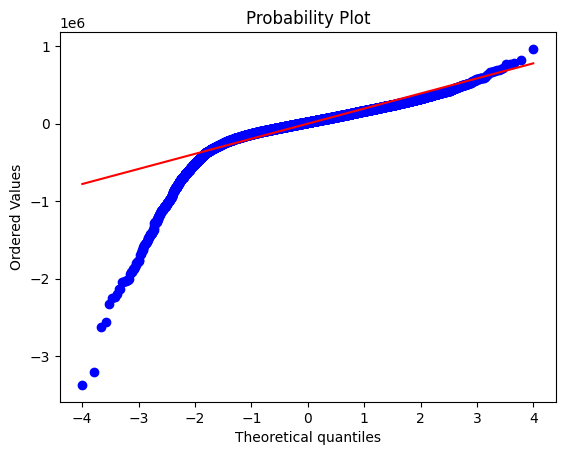

In [70]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [96]:
house['log_price'] = np.log(house['price'])
house['log_sqft_living'] = np.log(house['sqft_living'])
house['log_sqft_lot'] = np.log(house['sqft_lot'])
house['log_sqft_above'] = np.log(house['sqft_above'])
house['log_sqft_living15'] = np.log(house['sqft_living15'])
house['log_sqft_lot15'] = np.log(house['sqft_lot15'])

In [97]:
log_results = ols("log_price ~ bedrooms + bathrooms + log_sqft_living + log_sqft_lot + view + grade + log_sqft_above + yr_built + renov + lat + long + log_sqft_living15 + log_sqft_lot15", data=house).fit()
print(log_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     5228.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:00:26   Log-Likelihood:                -1306.8
No. Observations:               21581   AIC:                             2642.
Df Residuals:                   21567   BIC:                             2753.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -47.2580      2.10

In [98]:
log_results_1 = ols("log_price ~ bedrooms + bathrooms + log_sqft_living + view + grade + log_sqft_above + yr_built + renov + lat + log_sqft_living15 + log_sqft_lot15", data=house).fit()
print(log_results_1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     6178.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:01:25   Log-Likelihood:                -1307.4
No. Observations:               21581   AIC:                             2639.
Df Residuals:                   21569   BIC:                             2734.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -47.0724      0.69

In [100]:
log_pred_vals = log_results_1.predict(house[['log_sqft_living','bedrooms', 'bathrooms', 'grade', 'view', 'log_sqft_above', 'renov','lat', 'yr_built', 'log_sqft_living15', 'log_sqft_lot15']])

In [105]:
log_res = pd.concat([log_pred_vals.to_frame().rename(columns={0:'y_hat'}),house['log_price']], axis=1)

In [106]:
log_res

,y_hat,log_price
0,12.611167,12.309982
1,13.363742,13.195614
2,12.836402,12.100712
3,12.875534,13.311329
4,13.049510,13.142166
...,...,...
21608,13.089963,12.793859
21609,12.935598,12.899220
21610,12.427577,12.904459
21611,12.897268,12.899220


In [107]:
log_res['error'] = log_res['y_hat'] - log_res['log_price']

In [108]:
log_res['sq_error'] = log_res['error']**2

In [109]:
np.sqrt(log_res['sq_error'].mean())

0.25708211303680484

((array([-3.9966847 , -3.78144359, -3.66370395, ...,  3.66370395,
          3.78144359,  3.9966847 ]),
  array([-1.44340096, -1.21603653, -1.14787536, ...,  1.21636098,
          1.3178868 ,  1.33005613])),
 (0.2563607958073783, -1.1785080845637595e-13, 0.9970164711277619))

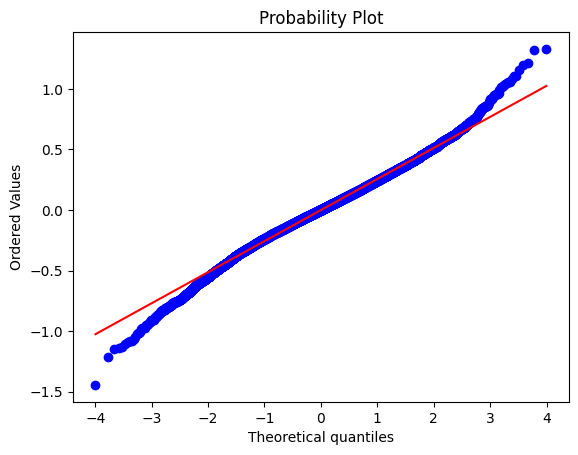

In [110]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(log_res['error'], dist='norm', plot=ax)

In [111]:
categorical_features = ['renov', 'grade','bedrooms','bathrooms','view']
numerical_features = ['log_sqft_living', 'lat','long','log_sqft_above', 'yr_built', 'log_sqft_living15', 'log_sqft_lot15']
target = 'log_price'

In [112]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(house[categorical_features + numerical_features]
                                                    ,house[target],
                                                    test_size = 0.3, random_state=1234)

In [113]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [114]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [115]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [116]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['renov', 'grade', 'bedrooms',
                                                   'bathrooms', 'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living', 'lat',
                                                   'long', 'log_sqft_above',
                                                   'yr_built',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15'])])),
                ('regressor', LinearRegression())])

In [117]:
pred = linear_regression.predict(X_test)

In [118]:
pred

array([12.22007799, 13.2469868 , 12.9582122 , ..., 12.63298918,
       13.96232176, 13.15736406])

In [119]:
from sklearn.metrics import mean_squared_error

In [120]:
np.sqrt(mean_squared_error(pred,y_test))

0.25190652630157

In [121]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [122]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['renov', 'grade', 'bedrooms',
                                                   'bathrooms', 'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living', 'lat',
                                                   'long', 'log_sqft_above',
                                                   'yr_built',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15'])])),
                ('regressor', Ridge(alpha=3.0))])

In [123]:
pred_ridge = ridge_regression.predict(X_test)

In [124]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

0.2519026179968532

In [129]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [130]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['renov', 'grade', 'bedrooms',
                                                   'bathrooms', 'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living', 'lat',
                                                   'long', 'log_sqft_above',
                                                   'yr_built',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15'])])),
                ('regressor', Lasso())])

In [131]:
lasso_pred = lasso_regression.predict(X_test)

In [132]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

0.5180792904786247

In [133]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [134]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['renov', 'grade', 'bedrooms',
                                                   'bathrooms', 'view']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['log_sqft_living', 'lat',
                                                   'long', 'log_sqft_above',
                                                   'yr_built',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [135]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [136]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

0.5180792904786247